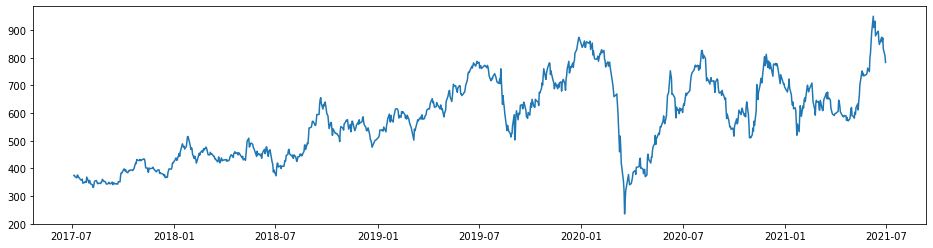

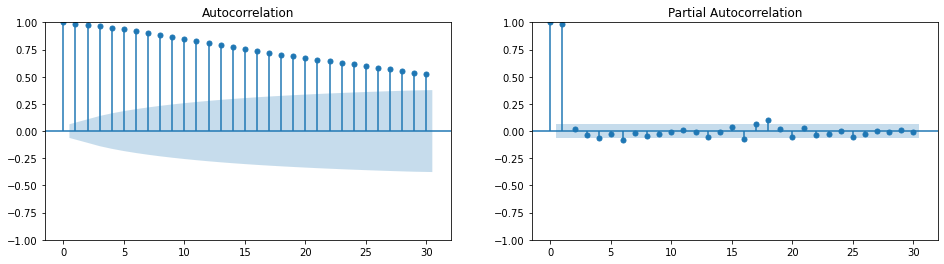

In [2]:
# load statsmodels
import statsmodels.tsa.arima.model as arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
import arch

X = pd.read_csv('../Datasets/YPFD.2000.2021.csv', index_col=0, usecols=[1, 2], parse_dates=True)
X = X.loc[X.ultimoPrecio>0]
plt.figure(figsize=(16,4))
plt.plot(X);
fig, ax = plt.subplots(1,2, figsize=(16,4))
plot_acf(X.ultimoPrecio, ax=ax[0]);
plot_pacf(X.ultimoPrecio, method='ywm', ax=ax[1]);


In [3]:
model = arima.ARIMA(X[:-20], order=(2,1,2));
model_fit = model.fit();
# one-step out-of sample forecast
forecast = model_fit.forecast();

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored w

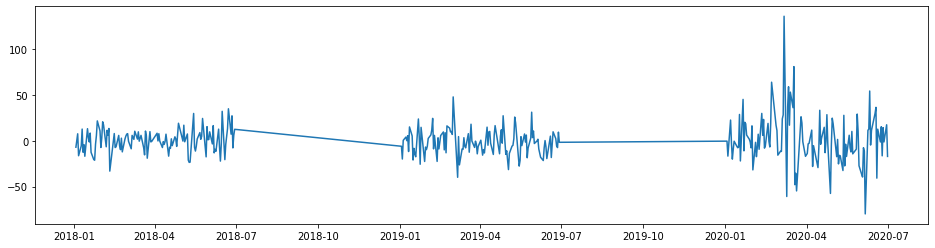

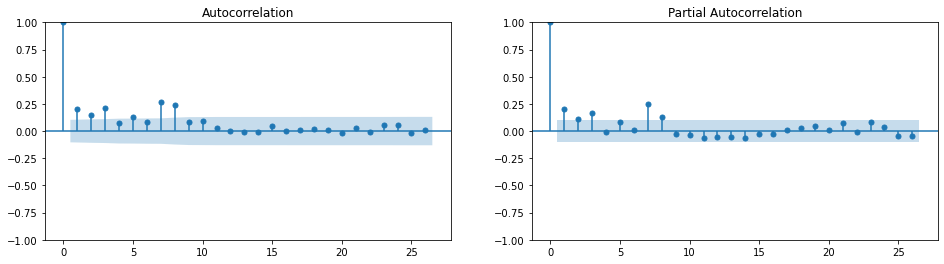

In [4]:
residuals = model_fit.resid
residuals = residuals.loc[(residuals.index.year<2021) & (residuals.index.month<7)]
plt.figure(figsize=(16,4))
plt.plot(residuals);
fig, ax = plt.subplots(1,2, figsize=(16,4))
plot_acf(residuals**2, ax=ax[0])
plot_pacf(residuals**2, method='ywm', ax=ax[1]);

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3279.1384788283385
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2800.434348785667
Iteration:      3,   Func. Count:     17,   Neg. LLF: 2799.5930526331945
Iteration:      4,   Func. Count:     22,   Neg. LLF: 2799.4408880165583
Iteration:      5,   Func. Count:     27,   Neg. LLF: 2798.5242712408067
Iteration:      6,   Func. Count:     32,   Neg. LLF: 2793.66303822786
Iteration:      7,   Func. Count:     37,   Neg. LLF: 2771.200056981049
Iteration:      8,   Func. Count:     42,   Neg. LLF: 2787.4954738229735
Iteration:      9,   Func. Count:     48,   Neg. LLF: 2748.908367736428
Iteration:     10,   Func. Count:     53,   Neg. LLF: 2748.779344792045
Iteration:     11,   Func. Count:     58,   Neg. LLF: 2748.7773111398374
Iteration:     12,   Func. Count:     63,   Neg. LLF: 2748.7772258400955
Iteration:     13,   Func. Count:     67,   Neg. LLF: 2748.777224341431
Optimization terminated successfully    (Exit mode 0)
    

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.432e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

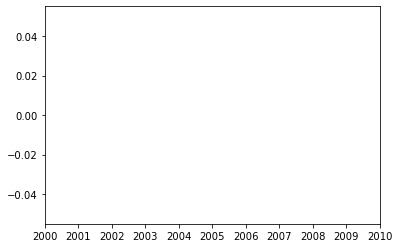

In [11]:
garch = arch.arch_model(residuals**2, p=1, q=1)
garch_fit = garch.fit()

# Use ARIMA to predict mu
predicted_mu = model_fit.forecast(10)
# Use GARCH to predict the residual
garch_forecast = garch_fit.forecast(horizon=10)
predicted_et = garch_forecast.mean
# Combine both models' output: yt = mu + et
prediction = predicted_mu + predicted_et
plt.plot(prediction)


In [12]:
prediction

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,949,950,951,952,953,954,955,956,957,958
fechaHora,,,,,,,,,,,,,,,,,,,,
2020-06-30 17:00:05.727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29 17:00:06.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-26 17:00:07.180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-25 17:00:05.863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-24 17:00:05.647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-08 17:00:07.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 17:00:05.783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04 17:00:08.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
